# Store Project Startup Expansion

# Import Libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load Data

In [171]:
startup = pd.read_excel('startup-expansion.xlsx')

In [172]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [173]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [174]:
startup[["Marketing Spend","Revenue"]].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## Data Preprocessing

In [175]:
startup["City"].nunique()

149

In [176]:
startup["City"].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [177]:
startup["City"].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [178]:
startup["State"].nunique()

35

In [179]:
startup["State"].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [180]:
startup["State"].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [181]:
startup["Sales Region"].nunique()

2

In [182]:
startup["Sales Region"].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [183]:
startup["Sales Region"].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [184]:
startup["New Expansion"].nunique()

2

In [185]:
startup["New Expansion"].unique()

array(['Old', 'New'], dtype=object)

In [186]:
startup["New Expansion"].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [187]:
# function to count missing data and in which feature.
def missing_data(data):
    nb_values = data.isnull().sum().sort_values(ascending = False) #contains the number of values missing
    percent_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False) #contains the percentage of values missing
    return pd.concat([nb_values, percent_values], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])

missing_data(startup).head(9)

,Number of Missing Values,Percentage of Missing Values
Store ID,0,0.0
City,0,0.0
State,0,0.0
Sales Region,0,0.0
New Expansion,0,0.0
Marketing Spend,0,0.0
Revenue,0,0.0


In [188]:
# Check for duplicate rows
duplicate_rows = startup[startup.duplicated()]

# Print results before removal
if not duplicate_rows.empty:
    print(f"There are {len(duplicate_rows)} duplicate rows in the dataset. Removing them now...")
    df_raw = df_raw.drop_duplicates()  # Remove duplicates
    print("Duplicates removed successfully!")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


## Exploring Data Analysis (EDA)

In [189]:
startup.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
137,138,Norwalk,California,Region 2,Old,3112,19703
105,106,Richardson,Texas,Region 2,Old,3228,22824
30,31,Boulder,Colorado,Region 2,Old,3083,22680
114,115,McAllen,Texas,Region 2,Old,2282,43924
71,72,Ontario,California,Region 2,Old,3168,52078
10,11,Rialto,California,Region 2,Old,2541,16860
78,79,Pueblo,Colorado,Region 2,Old,2928,19563
113,114,Renton,Washington,Region 2,Old,2754,44635
55,56,Thornton,Colorado,Region 2,Old,2642,46490
35,36,Pearland,Texas,Region 2,Old,3127,20057


<Axes: xlabel='Sales Region'>

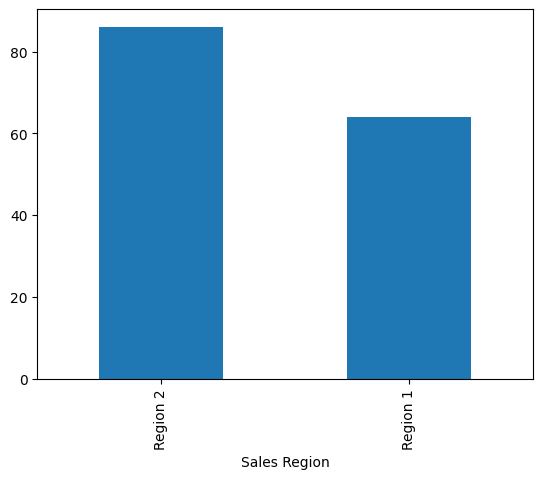

In [190]:
startup["Sales Region"].value_counts().plot.bar()

<Axes: xlabel='New Expansion'>

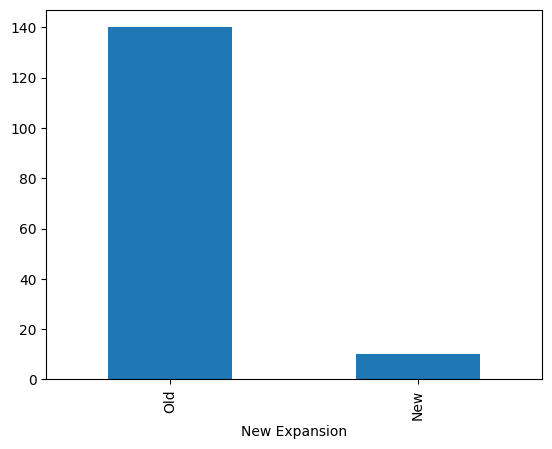

In [191]:
startup["New Expansion"].value_counts().plot.bar()

In [192]:
startup.groupby("New Expansion").groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [193]:
startup[startup["New Expansion"] == "Old"].groupby(["State"]).sum()["Revenue"].nlargest(10)


State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [194]:
startup[startup["New Expansion"] == "New"].groupby(["State"]).sum()["Revenue"].nlargest(10)


State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [195]:
startup[startup["New Expansion"] == "Old"].groupby(["State"]).sum()["Revenue"].nlargest(10)


State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [200]:
# startup["ROMS"] =round((startup["Revenue"]/startup["Marketing Spend"]) * 100, 2)
startup["Profit"] = startup["Revenue"] - startup["Marketing Spend"]
startup["ROMS"] = round((startup["Profit"] / startup["Marketing Spend"])*100, 2)
startup["ROMS%"] = startup["ROMS"]/100

In [202]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [206]:
startup.to_csv("expansion_startup_new.csv")